# [Problem 1 to 7]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
class ScratchKMeans():
    """
    K-means scratch implementation
    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        self.best_sse = 10**10
        for i in range(self.n_init):
            
            # Initialize centers
            self.centroids = self._initialize_centers(X)
            
            # Setup the clusters by assigning labels
            X_labeled = np.zeros((X.shape[0],X.shape[1]+1))
            X_labeled[:,:-1] = X
            
            for j in range(self.max_iter):
                self._reclustering(X_labeled)
                
                old_centroids = self.centroids
                self._centroids_update(X_labeled)
                
                # Output learning process
                if self.verbose:
                    fig = plt.subplots(figsize=(20,8))
                    plt.rcParams["font.size"] = 16
                    
                    for k in range(self.n_clusters):
                        plt.scatter(X[X_labeled[:,-1] == k,0],X[X_labeled[:,-1] == k,1],label=k)
                    plt.scatter(self.centroids[:,0],self.centroids[:,1],s=110,label="centroids")
                    plt.legend()
                    plt.show()
                
                # Stop iteration
                if np.sum(old_centroids - self.centroids) <= self.tol:
                    sse = self._sse(X_labeled)
                    if self.best_sse > sse:
                        self.best_sse = sse
                        self.best_centroids = self.centroids
                    break
            
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.zeros(len(X))
        
        for i in range(len(X)):
            max_dist = 10**10
            for j in range(self.n_clusters):
                dist = np.linalg.norm(X[i,:] - self.centroids[j])
                if dist < max_dist:
                    max_dist = dist
                    y_pred[i] = j
        
        return y_pred

    def _initialize_centers(self, X):
        """
         Choose K points from samples set X, shape (n_samples, n_features)
        """
        return X[np.random.choice(X.shape[0], self.n_clusters, replace=False), :]
    
    def _sse(self,X):
        """
        Calculate SSE for the sample set X, shape(n_samples, n_features + 1)
        """
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters): # Calculate SSE within cluster
                if X[i,-1] == j:
                    sse += np.linalg.norm(X[i,:-1] - self.centroids[j])**2
        return sse
    
    def _reclustering(self, X):
        """
        Reassigning all points to nearest centroids based on Euclidean distance, X, shape(n_samples, n_features + 1)
        """
        for i in range(len(X)):
            max_dist = 10**10
            for j in range(self.n_clusters):
                # Calculate distance to each centroid
                dist = np.linalg.norm(X[i,:-1] - self.centroids[j])
                if dist < max_dist:
                    max_dist = dist
                    X[i,-1] = j
    def _centroids_update(self, X):
        """
        Moves the center point to the mean (centroid) of all data points assigned to the cluster.
        """
        for i in range(self.n_clusters):
            self.centroids[i] = np.mean(X[ X[:,-1] == i, :-1 ],axis=0)

## Testing with sample data

In [56]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

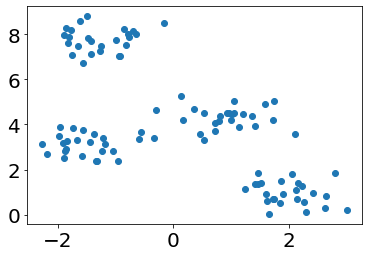

In [57]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [58]:
model = ScratchKMeans(n_clusters=4,n_init=4,max_iter=500,tol=1e-5,verbose=True)

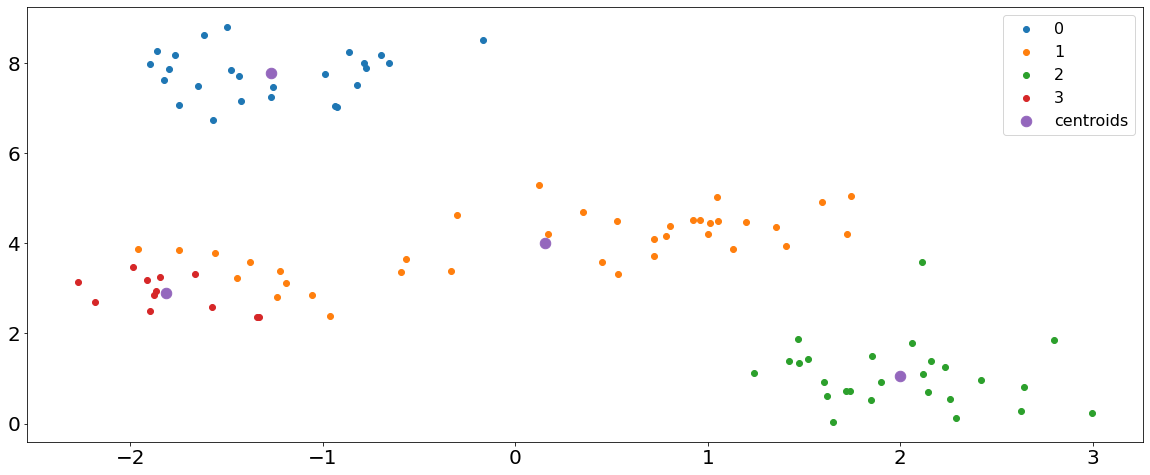

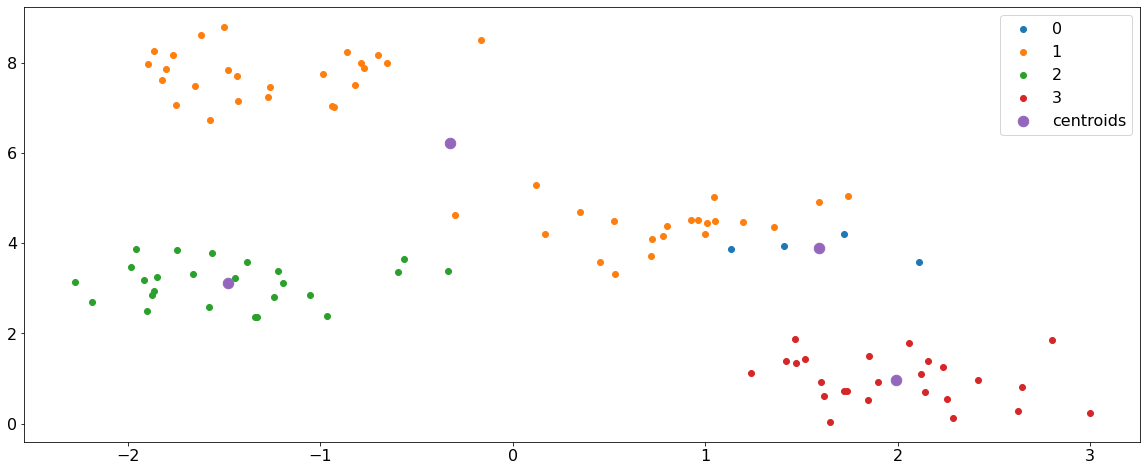

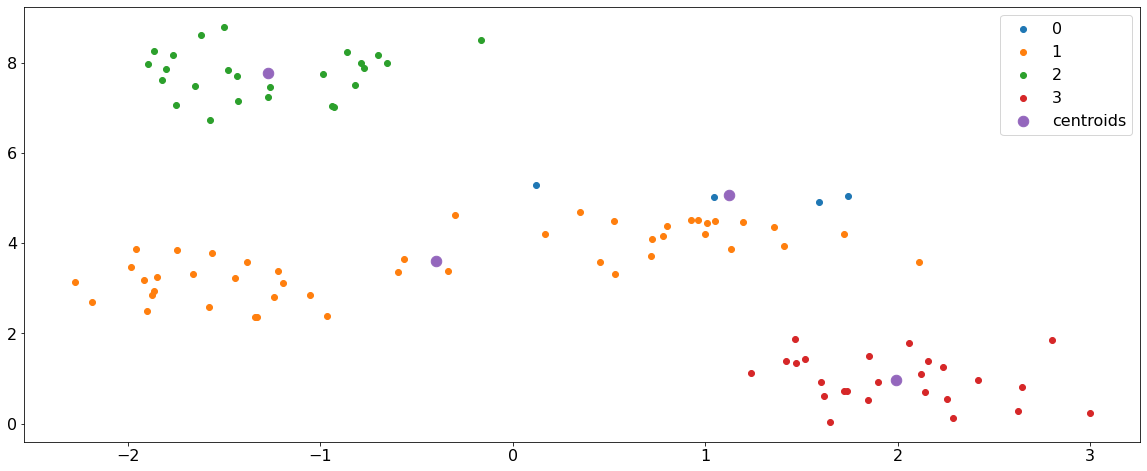

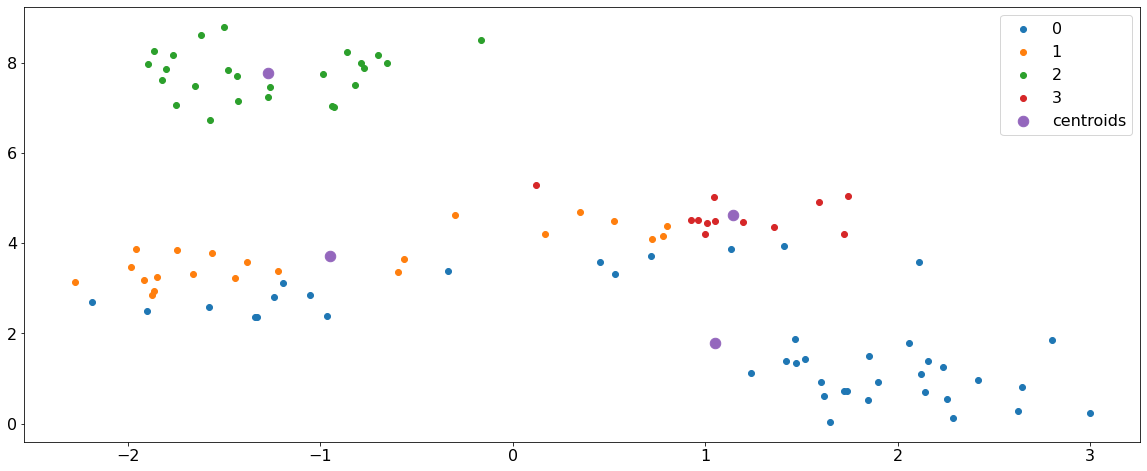

In [59]:
model.fit(X)

# [Problem 8]

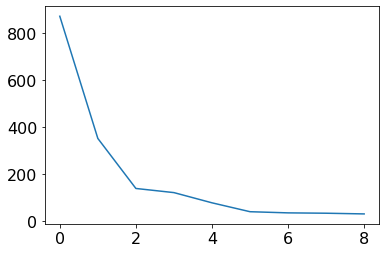

In [69]:
# Implementation of Elbow method
elbow = []
for i in range(1,10):
    model = ScratchKMeans(n_clusters=i,n_init=7,max_iter=1000,tol=1e-5,verbose=False)
    model.fit(X)
    elbow.append(model.best_sse)
plt.plot(elbow)

# [Problem 10]

In [121]:
import pandas as pd
df = pd.read_csv("WholesalerData.csv")
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


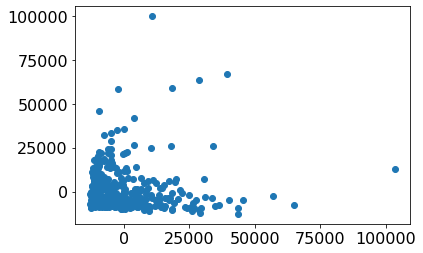

In [153]:
# Reduce the dimensions of the dataset
from sklearn.decomposition import PCA
data = df.iloc[:,2:7]
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data) 
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show()

It seems like we need to normalize the data 

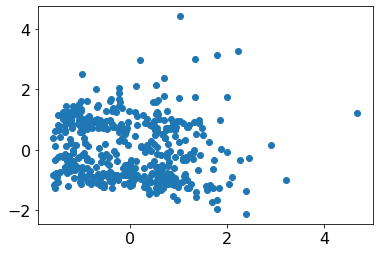

In [131]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
data_scaled = scaler.fit_transform(data_pca)
plt.scatter(data_scaled[:,0],data_scaled[:,1])
plt.show()

In [132]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
def plot_pca(data,n):
    pca = PCA(n_components=n)
    pca = pca.fit(data)
    var_exp = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(var_exp)
    print(cum_var_exp)
    plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel = 'Explained variance ratio'
    plt.xlabel = 'Principal components'
    plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

[0.46798756 0.88100566 0.9480229  0.99302841 1.        ]


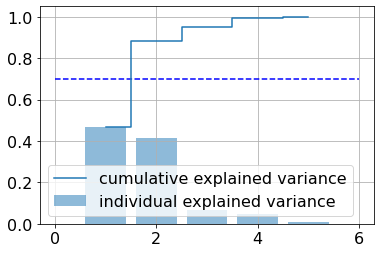

In [135]:
data = df.iloc[:,2:7] # Remove channel and region from list of features
plot_pca(data,5)

From the graph depicting distributed explanation rate of PCA, 3 or 4 are ideal number of features to be chosen as it will contain around 90% to 95% variance of the original data.

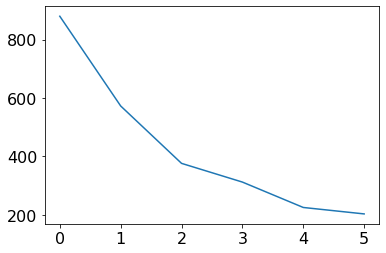

In [137]:
# Implementation of Elbow method
elbow = []
for i in range(1,7):
    model = ScratchKMeans(n_clusters=i,n_init=7,max_iter=1000,tol=1e-5,verbose=False)
    model.fit(data_scaled)
    elbow.append(model.best_sse)
plt.plot(elbow)

Using the elbow method, we can choose 3 as the number of clusters when training a K-means model.

# [Problem 11]

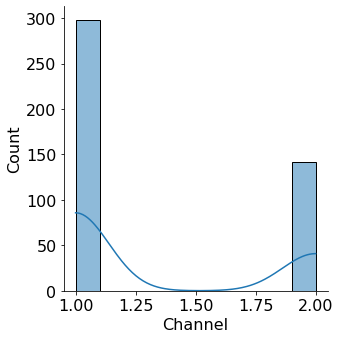

In [141]:
# Visualizing the distribution of data regarding channel
import seaborn as sns
sns.displot(data=df["Channel"], kde=True)

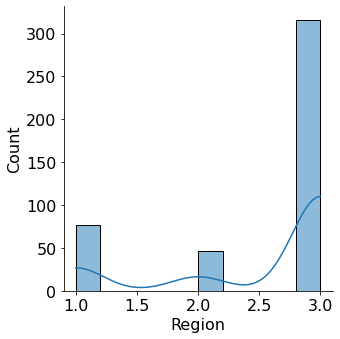

In [142]:
# Visualizing the distribution of data regarding region
sns.displot(data=df["Region"], kde=True)

The distribution of data based on these features are not clearly separable since the values are measured with respect to similarity. Hence, these features can not be used for K-means.  

# [Problem 12]

In [184]:
model = ScratchKMeans(n_clusters=3,n_init=7,max_iter=1000,tol=1e-5,verbose=False)
model.fit(data.values)
cluster = model.predict(data.values)

In [185]:
df["Cluster"] = cluster
df.groupby(["Cluster","Channel","Region"]).mean()

Fresh          Milk       Grocery  \
Cluster Channel Region                                             
0.0     1       1        4357.500000  17146.000000  14618.500000   
                3        5688.500000  15195.500000  12959.000000   
        2       1        4302.166667  13440.833333  23713.250000   
                2        4780.727273  12067.272727  22680.454545   
                3        7188.208333  16363.395833  23889.500000   
1.0     1       1       43803.800000   3957.400000   3926.200000   
                2       32717.000000  16784.000000  13626.000000   
                3       44764.960000   7176.200000   6384.440000   
        2       3       37371.333333   6726.333333   7529.333333   
2.0     1       1       10259.596154   3351.211538   3628.346154   
                2       10870.296296   1767.962963   4053.629630   
                3        9770.478261   2858.461957   3448.760870   
        2       1        6995.666667   5470.333333   7989.333333   
                2       10739.750000   5235.625000   7589.375000   
                3       10651.111111   6433.037037   9367.888889   

                              Frozen  Detergents_Paper   Delicassen  
Cluster Channel Region                                               
0.0     1       1        5764.500000       3329.000000  3012.000000  
                3        2039.000000       3594.500000  2638.000000  
        2       1        2153.000000      10679.750000  2188.833333  
                2        1050.363636      12007.909091  1211.181818  
                3        1524.687500      10585.250000  1985.000000  
1.0     1       1        7326.000000        679.800000  1976.600000  
                2       60869.000000       1272.000000  5609.000000  
                3        7883.240000        828.080000  4220.040000  
        2       3         727.666667       2330.333333  2148.000000  
2.0     1       1        2622.173077        885.076923  1052.403846  
                2        3703.407407        453.481481   939.111111  
                3        3100.255435        750.538043  1139.027174  
        2       1        3446.333333       3316.333333  1238.166667  
                2        2214.625000       3463.500000  1277.250000  
                3        1546.629630       3876.611111  1667.185185

In [187]:
model2 = ScratchKMeans(n_clusters=3,n_init=7,max_iter=1000,tol=1e-5,verbose=False)
model.fit(data_scaled)
cluster = model.predict(data_scaled)

In [190]:
df["Cluster"] = cluster
df["Channel"].replace({1: "Horeca", 2: "Retail"}, inplace=True)
df["Region"].replace({1: "Lisbon", 2: "Orpoeto", 3: "Others"}, inplace=True)
df.groupby(["Cluster","Channel","Region"]).mean()

Fresh          Milk       Grocery  \
Cluster Channel Region                                              
0.0     Horeca  Lisbon   13761.727273   8525.545455   8614.181818   
                Orpoeto  19491.750000   5384.000000   9854.000000   
                Others   20271.652174   9082.521739   8886.434783   
        Retail  Lisbon    7875.500000  14010.000000  23263.800000   
                Orpoeto  10367.200000  10303.700000  20032.100000   
                Others   12505.521127  13051.591549  17366.450704   
1.0     Horeca  Lisbon    4914.966667   3041.566667   3213.166667   
                Orpoeto   5444.812500   1608.375000   3559.250000   
                Others    4581.495495   2929.567568   3396.351351   
        Retail  Lisbon    1855.625000   6751.500000  12482.125000   
                Orpoeto   2251.375000   8832.500000  13392.000000   
                Others    1640.967742   7011.580645  13767.032258   
2.0     Horeca  Lisbon   25689.166667   2406.333333   2577.277778   
                Orpoeto  20141.375000   2156.125000   3338.750000   
                Others   25369.805195   2619.129870   3100.233766   
        Retail  Orpoeto  16823.000000    928.000000   2743.000000   
                Others   31182.000000   2994.666667   5118.000000   

                               Frozen  Detergents_Paper   Delicassen  
Cluster Channel Region                                                
0.0     Horeca  Lisbon    3475.909091       1282.181818  2197.545455  
                Orpoeto  16044.000000       1154.750000  2317.250000  
                Others    5523.956522       1240.782609  4474.695652  
        Retail  Lisbon    3211.900000      10708.800000  1697.200000  
                Orpoeto   1162.200000       9740.100000  1211.000000  
                Others    1738.478873       7546.943662  2067.816901  
1.0     Horeca  Lisbon    2598.000000       1146.933333   687.133333  
                Orpoeto   4541.625000        332.562500   845.062500  
                Others    2001.369369        864.747748   933.234234  
        Retail  Lisbon    1799.375000       5120.875000  2090.375000  
                Orpoeto    761.250000       7757.750000   993.125000  
                Others    1036.709677       5965.419355  1320.225806  
2.0     Horeca  Lisbon    3796.500000        420.500000  1435.833333  
                Orpoeto   3002.375000        447.000000  1021.875000  
                Others    5485.753247        538.506494  1478.584416  
        Retail  Orpoeto  11559.000000        332.000000  3486.000000  
                Others    1105.333333       1219.666667  1336.666667

From the statistic obtained above, we can see that:
 - Grocery is always one of the fields wholesaler's customer spend the most of their money
 - Every hotel, cafe and restaurant spend a lot of their revenues on fresh commodity which is reasonable as their services involves food and beverages